In [1]:
import matplotlib.pyplot as plt
import numpy as np

import nsta.tcspcdata, nsta.tadata, nsta.analysis

import importlib
nsta.analysis = importlib.reload(nsta.analysis)

In [2]:
ta_data = nsta.tadata.TAData()
ta_data.delta_od = "../../HQC/HQC_MeOH_387nm_66ns_2001ms_0fs/TA/0001/HQC_MeOH_387nm_NS_2D_DeltaOD_uncor.dat"
ta_data.missed_shots = "../../HQC/HQC_MeOH_387nm_66ns_2001ms_0fs/TA/0001/HQC_MeOH_387nm_NS_missed_shots.dat"
ta_data.status_numbers = "../../HQC/HQC_MeOH_387nm_66ns_2001ms_0fs/TA/0001/HQC_MeOH_387nm_NS_cmbstatusnumber.dat"

tcspc_data = nsta.tcspcdata.TCSPCData()
tcspc_data.delays_directory = "../../HQC/HQC_MeOH_387nm_66ns_2001ms_0fs/TCSPC"

num spectra before processing: 72969
num spectra after processing: 72969


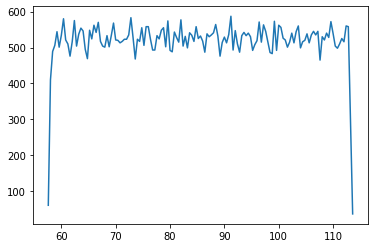

In [3]:
print("num spectra before processing:", ta_data.num_spectra)

ana = nsta.analysis.TATCSCPAnalysis(ta_data, tcspc_data)
ana.process_data()

plt.plot(ana.delay_statistics[0], ana.delay_statistics[1])
plt.show()

In [76]:
-1 * np.around(2 * np.random.rand(ana.ta_data.num_steps)).astype(int)

array([-2,  0, -1, -2, -2, -1,  0, -1,  0, -1, -2,  0, -1, -1, -2, -1, -2,
       -1, -1, -1, -2,  0,  0, -1, -2, -1, -1, -1, -1,  0,  0, -1,  0, -1,
        0, -2, -1,  0, -1, -1,  0, -1, -2,  0,  0, -2, -1, -1,  0,  0,  0,
        0, -2, -2, -1, -1, -2, -1, -1, -1,  0, -1, -1, -1, -1, -1, -2,  0,
       -1, -2, -1, -1, -2,  0, -2, -1,  0, -2,  0, -2, -1, -1, -1, -2, -1,
       -2, -1,  0, -1, -2, -1,  0,  0, -2,  0, -1, -2, -2, -1, -2,  0, -2,
        0,  0, -2,  0, -2, -1, -2,  0, -1, -1, -1,  0, -2, -1, -1, -2,  0,
       -1, -1,  0, -2, -1, -2, -2, -1, -2, -2, -1, -1, -1,  0, -1, -1, -1,
       -2,  0, -1,  0, -1, -2,  0, -1, -2, -2])

num spectra after processing: 72969


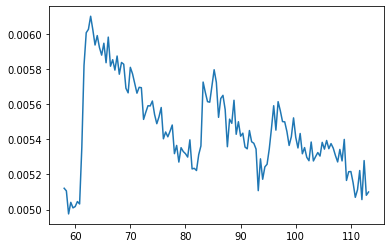

num spectra after processing: 72969


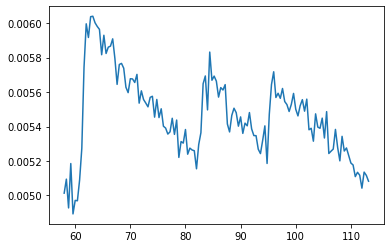

num spectra after processing: 72969


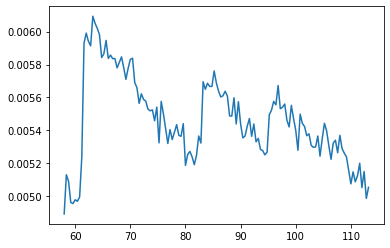

num spectra after processing: 72969


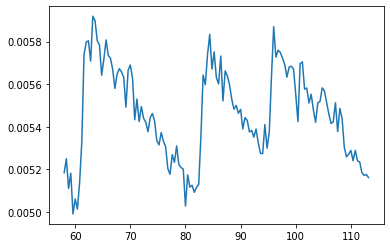

num spectra after processing: 72969


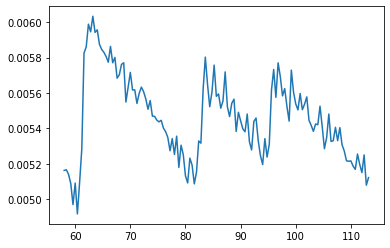

num spectra after processing: 72969


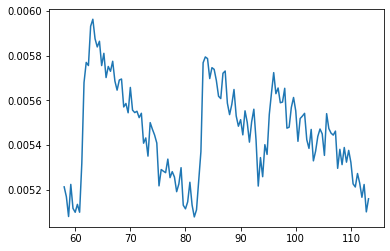

num spectra after processing: 72969


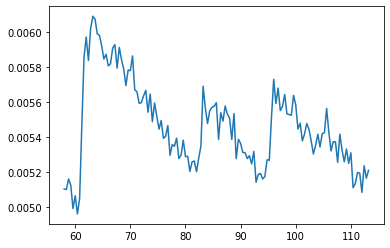

num spectra after processing: 72969


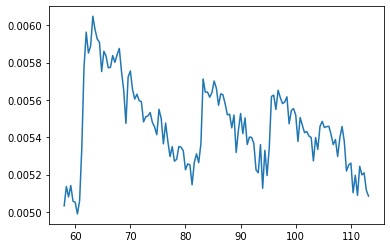

num spectra after processing: 72969


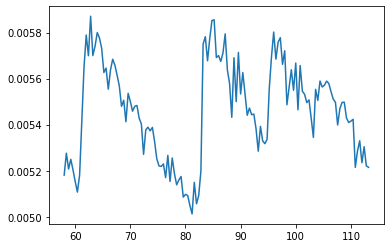

num spectra after processing: 72969


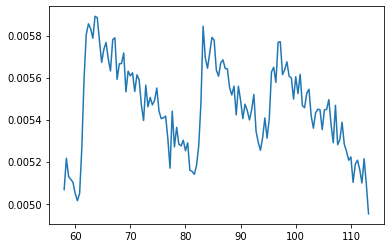

num spectra after processing: 72969


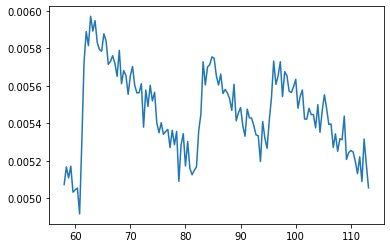

num spectra after processing: 72969


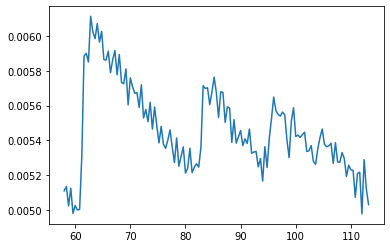

num spectra after processing: 72969


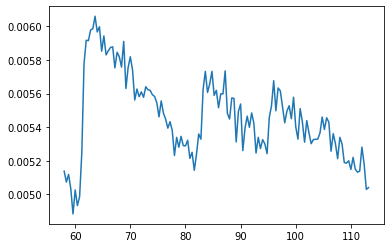

num spectra after processing: 72969


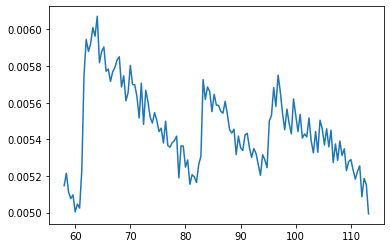

In [4]:
# ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
ana._delay_offsets = -1 * np.around(np.random.rand(ana.ta_data.num_steps)).astype(int)

for step_at in range(0, 140, 10):
    ana._delay_offsets = -1 * np.around(2 * np.random.rand(ana.ta_data.num_steps)).astype(int)
    ana.process_data()
    t, od = ana.plot_transient(120, 220)

    plt.figure()
    plt.plot(t, od)
    plt.show()

num spectra after processing: 72969


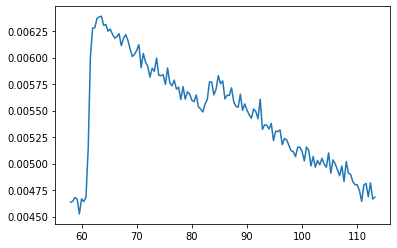

num spectra after processing: 72969


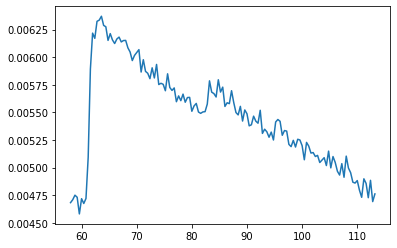

num spectra after processing: 72969


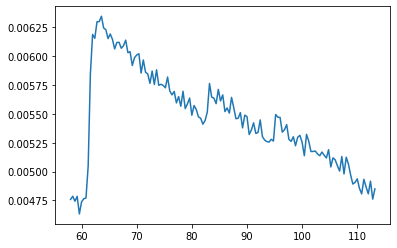

num spectra after processing: 72969


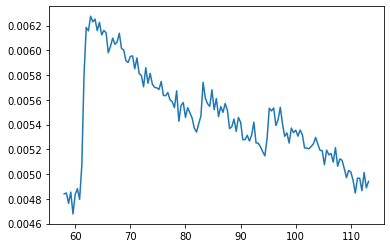

num spectra after processing: 72969


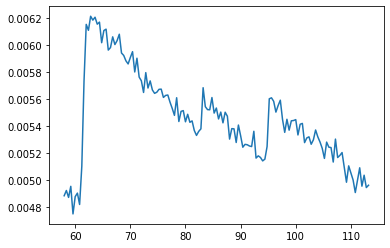

num spectra after processing: 72969


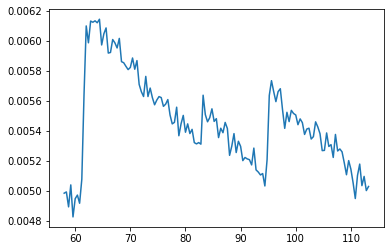

num spectra after processing: 72969


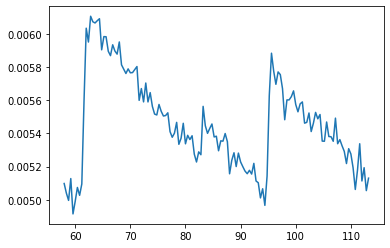

num spectra after processing: 72969


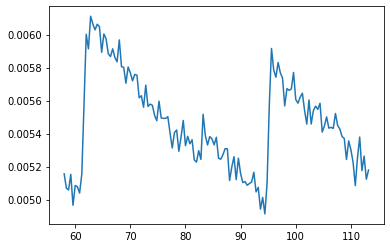

num spectra after processing: 72969


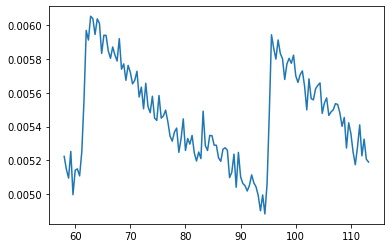

num spectra after processing: 72969


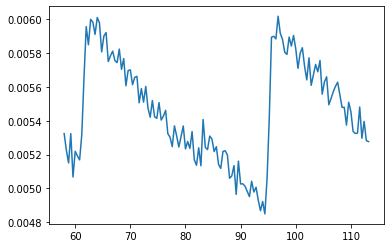

num spectra after processing: 72969


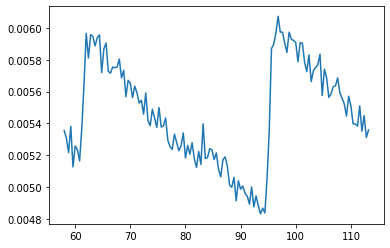

num spectra after processing: 72969


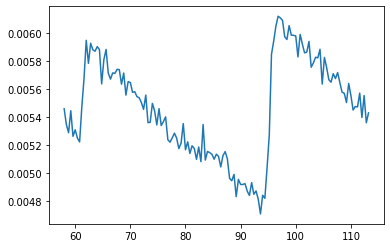

num spectra after processing: 72969


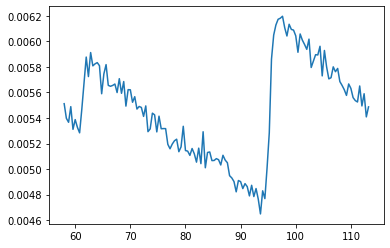

num spectra after processing: 72969


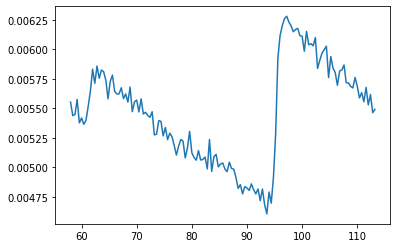

In [5]:
def binary_step(at, length, reverse=False):
    if reverse:
        return np.concatenate((np.ones(at, dtype=int), np.zeros(length - at, dtype=int)))
    else:
        return np.concatenate((np.zeros(at, dtype=int), np.ones(length - at, dtype=int)))

for step_at in range(0, 140, 10):
    ana._delay_offsets = -1 * binary_step(step_at, ana.ta_data.num_steps, reverse=False)
    ana.process_data()
    t, od = ana.plot_transient(120, 220)

    plt.figure()
    plt.plot(t, od)
    plt.show()

num spectra after processing: 72969
num spectra after processing: 72969
num spectra after processing: 72969


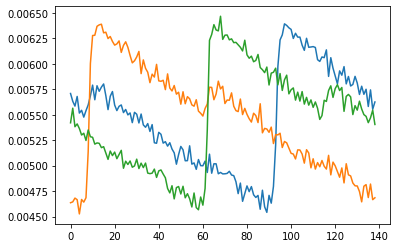

In [39]:
ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int)
ana.process_data()
_, od0 = ana.plot_transient(120, 220)
t = np.arange(*od0.shape) # x-axis as index

ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
ana.process_data()
_, od1 = ana.plot_transient(120, 220)

ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 2
ana.process_data()
_, od2 = ana.plot_transient(120, 220)

plt.figure()
plt.plot(t, od0, t, od1, t, od2)
plt.show()

# Optimierung V1

num spectra after processing: 72969


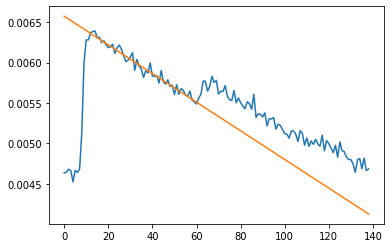

In [58]:
ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

from scipy import stats
s = slice(15, 50)
slope, intercept, _, _, _ = stats.linregress(t[s], od[s])
target = intercept + slope * t

plt.figure()
plt.plot(t, od, t, target)
plt.show()

In [38]:
def err(offsets, ana, target, slc):
    int_offsets = -1 * np.around(offsets).astype(int)
    ana._delay_offsets = int_offsets
    ana.process_data()
    _, od = ana.plot_transient(120, 220)
    err = target - od
    err = err[slc]
    print('err =', np.sum(err**2))
    return np.sum(err**2)

initial_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
slc = slice(70, 130)

last_err = err(initial_offsets, ana, target, slc)
last_offsets = initial_offsets.copy()
for i in range(ana.ta_data.num_steps):
    new_offsets = last_offsets.copy()
    new_offsets[i] += 1
    new_err = err(new_offsets, ana, target, slc)
    if new_err < last_err:
        print("updated offsets")
        print("last", last_offsets)
        print(" new", new_offsets)
        last_offsets = new_offsets

print(last_offsets)

2894
err = 0.00011217070396464338
updated offsets
last [ 0 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0 -1 -1 -1  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0 -1
 -1 -1  0 -1 -1  0  0 -1  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  0  0 -1 -1 -1 -1 -1 -1  0  0 -1  0  0 -1  0 -1 -1 -1
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
 new [ 0 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0 -1 -1 -1  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0 -1
 -1 -1  0 -1 -1  0  0 -1  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  0  0 -1 -1 -1 -1 -1 -1  0  0 -1  0  0 -1  0 -1 -1 -1
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
num spectra after processing: 72895
err = 0.0001

num spectra after processing: 72969


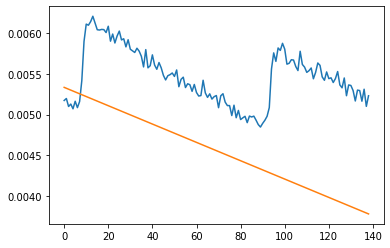

In [47]:
offsets = np.array([0,-1,-1,-1,0,0,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,-1,0,0,-1,0,0,0,0,0,0,-1,-1,-1,0,-1,0,0,0,-1,0,0,-1,0,0,-1,0,0,0,-1,-1,-1,0,-1,-1,0,0,-1,0,-1,0,-1,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,-1,-1,0,0,-1,0,0,-1,0,-1,-1,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,-1,-1,-1,0,0,0,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,0,0,0,-1,0,0,0,0,0,0,-1])

ana._delay_offsets = offsets
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

plt.figure()
plt.plot(t, od, t, target)
plt.show()

# Optimierung V2
andere Bereiche

In [51]:
s = slice(15, 130)

def err(offsets, ana, target, slc):
    int_offsets = -1 * np.around(offsets).astype(int)
    ana._delay_offsets = int_offsets
    ana.process_data()
    _, od = ana.plot_transient(120, 220)


    slope, intercept, _, _, _ = stats.linregress(t[s], od[s])
    target = intercept + slope * t

    err = target - od
    err = err[slc]
    print('err =', np.sum(err**2))
    return np.sum(err**2)

initial_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
slc = s # slice(70, 130)

last_err = err(initial_offsets, ana, target, slc)
last_offsets = initial_offsets.copy()
for i in range(ana.ta_data.num_steps):
    new_offsets = last_offsets.copy()
    new_offsets[i] += 1
    new_err = err(new_offsets, ana, target, slc)
    if new_err < last_err:
        print("updated offsets")
        print("last", last_offsets)
        print(" new", new_offsets)
        last_offsets = new_offsets

print(repr(last_offsets))

-1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
num spectra after processing: 72840
err = 1.8950209425116324e-05
updated offsets
last [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
 new [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -

KeyboardInterrupt: 

# Optimierung V3: Smoothness

In [54]:
def err(offsets, ana, slc):
    ana._delay_offsets = offsets
    ana.process_data()
    _, od = ana.plot_transient(120, 220)
    smoothness = np.std(np.diff(od[slc]))/np.abs(np.mean(np.diff(od[slc])))
    err = smoothness
    print('err =', np.sum(err**2))
    return np.sum(err**2)

initial_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
slc = slice(15, 130)

last_err = err(initial_offsets, ana, slc)
last_offsets = initial_offsets.copy()
for i in range(ana.ta_data.num_steps):
    new_offsets = last_offsets.copy()
    new_offsets[i] += 1
    new_err = err(new_offsets, ana, slc)
    if new_err < last_err:
        print("updated offsets")
        print("last", last_offsets)
        print(" new", new_offsets)
        last_offsets = new_offsets

print(repr(last_offsets))

0  0  0 -1  0 -1 -1 -1  0  0  0
  0  0 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0 -1  0  0 -1  0  0 -1  0  0  0  0
 -1 -1 -1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1  0  0 -1  0  0
 -1 -1  0 -1  0 -1 -1 -1  0 -1  0  0  0 -1  0  0  0 -1 -1 -1 -1  0 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
 new [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1 -1  0  0  0
  0  0 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0 -1  0  0 -1  0  0 -1  0  0  0  0
 -1 -1 -1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1  0  0 -1  0  0
 -1 -1  0 -1  0 -1 -1 -1  0 -1  0  0  0 -1  0  0  0 -1 -1 -1 -1  0 -1 -1
  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
num spectra after processing: 72969
err = 42.9989906903153
updated offsets
last [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1 -1 

num spectra after processing: 72969


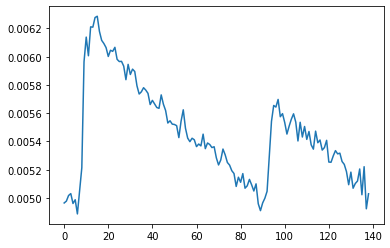

In [57]:
ana._delay_offsets = last_offsets
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

plt.figure()
plt.plot(t, od)
plt.show()

# Versuch 4: Alle Spektren eines Delays mitteln und plotten, sieht man den Verlauf? Position der Kante detektieren

In [34]:
def tadata_indices(all_delays_list, i):
    """Returns a slice to get spectra based on the index of the delays array."""
    begin = sum(map(len, ana.all_delays_list[:i]))
    print(begin)
    end = begin + len(ana.all_delays_list[i])
    print(len(ana.all_delays_list[i+1]))
    return slice(begin, end)

tadata_indices(ana.all_delays_list, 2)

999
499


slice(999, 1499, None)

In [ ]:
import importlib
nsta.analysis = importlib.reload(nsta.analysis)

ana = nsta.analysis.TATCSCPAnalysis(ta_data, tcspc_data)

num spectra after processing: 72969
len delays_sorted 500
shape tadata_cleaned_sorted (524, 500)


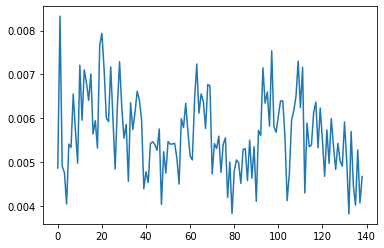

In [62]:
ana._delay_offsets = np.array([-1, -2, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

ana.process_data()

_, od = ana.plot_step_transient(4, 120, 220)
t = np.arange(*od.shape) # x-axis as index

plt.figure()
plt.plot(t, od)
plt.show()

# Versuch 5: Iterative Brute Force Geradenregression

num spectra after processing: 72969


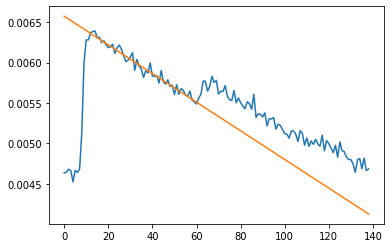

In [5]:
# Fit mit linregress
ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

from scipy import stats
s = slice(15, 50)
slope, intercept, _, _, _ = stats.linregress(t[s], od[s])
fit = intercept + slope * t

plt.figure()
plt.plot(t, od, t, fit)
plt.show()

num spectra after processing: 72969


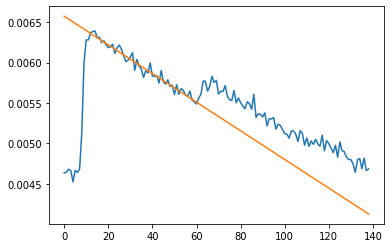

In [7]:
# Fit mit curve_fit
from scipy.optimize import curve_fit

ana._delay_offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

s = slice(15, 50)
popt, _ = curve_fit(lambda x, m, b: m*x + b, t[s], od[s])
slope, intercept = popt[0], popt[1]
fit = intercept + slope * t

plt.figure()
plt.plot(t, od, t, fit)
plt.show()

In [10]:
def err(offsets, ana, slc):
    ana._delay_offsets = offsets
    ana.process_data()
    _, od = ana.plot_transient(120, 220)

    popt, _ = curve_fit(lambda x, b: slope*x + b, t[s], od[s])
    target = popt[0] + slope * t

    err = target - od
    err = err[slc]
    print('err =', np.sum(err**2))
    return np.sum(err**2)

offsets = np.zeros(ana.ta_data.num_steps, dtype=np.int) - 1
slc = slice(70, 130)

test_values = [0, -1, -2]
for i in range(ana.ta_data.num_steps):
    new_offsets = []
    for val in test_values:
        new = offsets.copy()
        new[i] = val
        new_offsets.append(new)
    new_offsets = np.array(new_offsets)

    new_errs = [err(off, ana, slc) for off in new_offsets]
    min_err_idx = new_errs.index(min(new_errs))
    offsets[i] = test_values[min_err_idx]
    print(offsets)

 -1 -1 -1 -1 -1 -1
  0 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
num spectra after processing: 72969
err = 2.821618594955936e-06
num spectra after processing: 72969
err = 2.50294375320569e-06
num spectra after processing: 72969
err = 2.90815265734101e-06
[-1 -2 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -2 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1  0  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
num spectra after processing: 72969
err = 2.7210073774307538e-06
num spectra after processing: 72969
err = 2.50294375320569e-06
num spectra after processing: 72969
err = 2.833843107588501e-06

num spectra after processing: 72969


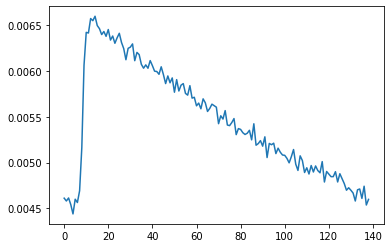

In [25]:
offsets_from_v5 = np.array([-1, -2, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -2, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1])

ana._delay_offsets = offsets_from_v5
ana.process_data()
_, od = ana.plot_transient(120, 220)
t = np.arange(*od.shape) # x-axis as index

plt.figure()
plt.plot(t, od)
plt.show()